### Why use a graph to model relationships between data points?

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'size'   : 16}
mpl.rc('font', **font)

import seaborn as sns
import scprep

In [21]:
sns.set_style('ticks')

In [22]:
from sklearn import datasets

In [23]:
data, t = datasets.make_swiss_roll(n_samples=500)
ix = np.argsort(t)
data = data[ix]
t = t[ix]

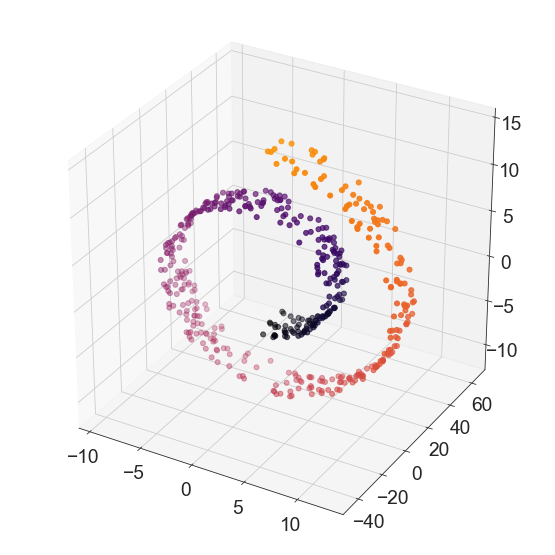

In [24]:
ax = scprep.plot.scatter3d(data, c=t, s=25,
                           legend=False, zorder=0, figsize=(8,8),
                          vmax=17)
#ix = [-10,-100,-2000]
#scprep.plot.scatter3d(data[ix], c=['blue', 'green', 'orange'], legend=False, ax=ax, s=500, zorder=1000)

fig = ax.figure
ax.set_ylim(-50,70)
fig.tight_layout()

In [25]:
from scipy.spatial.distance import pdist, squareform

In [26]:
pairwise_distances = squareform(pdist(data))

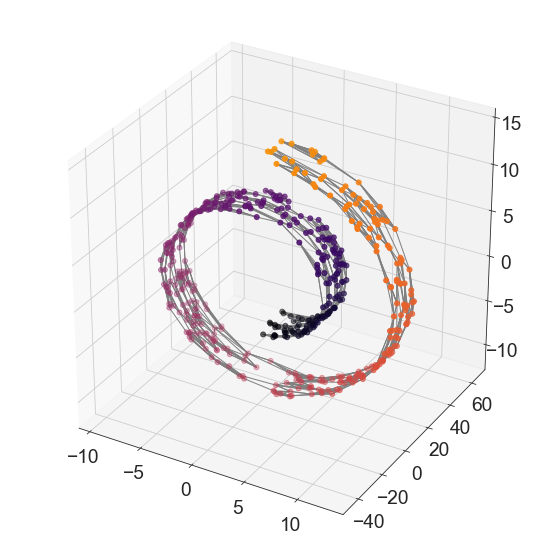

In [30]:
ax = scprep.plot.scatter3d(data, c=t, s=25,
                           legend=False, zorder=0, figsize=(8,8),
                          vmax=17)


sort_indices = np.argsort(pairwise_distances,  axis=1 )

# Find the kth neighbor
k = 5
# Why do we add 1 to k here?
knn_dist = sort_indices[:,:k+1]

# This block of code draws lines between each point and its k-nearest neighbors
for i, pt in enumerate(data):
    neighbors = knn_dist[i]
    for nn in neighbors:
        nn_coordinates = data[nn]
        ax.plot([pt[0], nn_coordinates[0]], [pt[1], nn_coordinates[1]], [pt[2], nn_coordinates[2]],
               color='grey', zorder=0, linewidth=1)

fig = ax.figure
ax.set_ylim(-50,70)
fig.tight_layout()

In [28]:
import sklearn.manifold
import sklearn.neighbors
from scipy import sparse

tsne_op = sklearn.manifold.TSNE(random_state=42)
# Retrieve the distance matrix, either using the precomputed one or
# computing it.
X = data
n_samples = X.shape[0]

neighbors_nn = None
# Cpmpute the number of nearest neighbors to find.
# LvdM uses 3 * perplexity as the number of neighbors.
# In the event that we have very small # of points
# set the neighbors to n - 1.
k = min(n_samples - 1, int(3. * tsne_op.perplexity + 1))

# Find the nearest neighbors for every point
knn = sklearn.neighbors.NearestNeighbors(algorithm='auto', n_neighbors=k,
                       metric=tsne_op.metric)
knn.fit(X)

distances_nn, neighbors_nn = knn.kneighbors(
    None, n_neighbors=k)

# Free the memory used by the ball_tree
del knn

if tsne_op.metric == "euclidean":
    # knn return the euclidean distance but we need it squared
    # to be consistent with the 'exact' method. Note that the
    # the method was derived using the euclidean method as in the
    # input space. Not sure of the implication of using a different
    # metric.
    distances_nn **= 2

# compute the joint probability distribution for the input space
P = sklearn.manifold.t_sne._joint_probabilities_nn(distances_nn, neighbors_nn,
                            tsne_op.perplexity, tsne_op.verbose)

degrees_of_freedom = max(tsne_op.n_components - 1, 1)

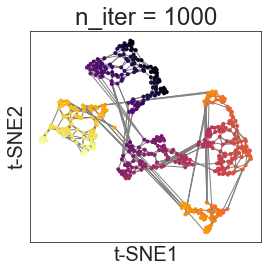

In [47]:
np.random.seed(42)
X_init = 1e-4 * np.random.randn(
    n_samples, tsne_op.n_components).astype(np.float32)
for n_iter in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500, 750, 1000]:
    tsne_op._EXPLORATION_N_ITER = 10 # min(n_iter, 250)
    tsne_op.n_iter = n_iter + tsne_op._EXPLORATION_N_ITER
    np.random.seed(42)
    X_embedded = tsne_op._tsne(P, degrees_of_freedom, n_samples,
                  X_embedded=X_init,
                  neighbors=neighbors_nn,
                  skip_num_points=0)
    ax = scprep.plot.scatter2d(X_embedded, c=t, ticks=False, legend=False,
                               label_prefix="t-SNE", figsize=(4,4),
                               title="n_iter = {}".format(n_iter), fontsize=14)
    for i, pt in enumerate(X_embedded):
        neighbors = knn_dist[i]
        for nn in neighbors:
            nn_coordinates = X_embedded[nn]
            ax.plot([pt[0], nn_coordinates[0]], [pt[1], nn_coordinates[1]],
                   color='grey', zorder=0, linewidth=1)
    plt.savefig("../img/tsne/{}.png".format(n_iter))

In [68]:
plt.close('all')

In [42]:
import umap

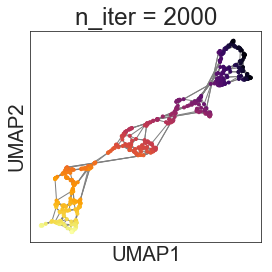

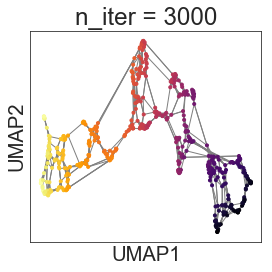

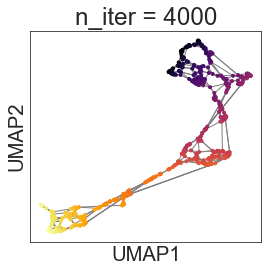

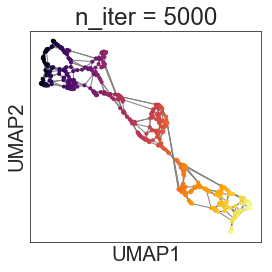

In [90]:
def valid(self):
    pass
umap.UMAP._validate_parameters = valid
for n_iter in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 750, 1000, 1250, 1500, 2000, 3000, 4000, 5000]:
    X_embedded = umap.UMAP(n_epochs=n_iter, random_state=42).fit_transform(data)
    ax = scprep.plot.scatter2d(X_embedded, c=t, ticks=False, legend=False,
                                   label_prefix="UMAP", figsize=(4,4),
                                   title="n_iter = {}".format(n_iter), fontsize=14)
    for i, pt in enumerate(X_embedded):
        neighbors = knn_dist[i]
        for nn in neighbors:
            nn_coordinates = X_embedded[nn]
            ax.plot([pt[0], nn_coordinates[0]], [pt[1], nn_coordinates[1]],
                   color='grey', zorder=0, linewidth=1)
    plt.savefig("../img/umap/{}.png".format(n_iter))

In [91]:
import phate
phate_op = phate.PHATE(random_state=42, mds='classic')
X_init = phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 500 cells and 3 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.09 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating classic MDS...
  Calculated classic MDS in 0.07 seconds.
Calculated PHATE in 0.24 seconds.


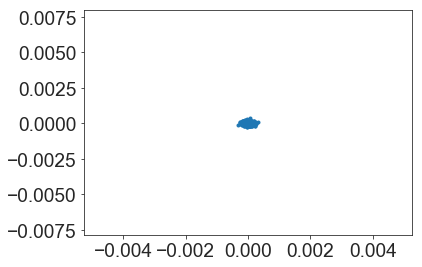

In [92]:
from scipy.spatial.distance import pdist, squareform
D = squareform(pdist(phate_op.diff_potential))
np.random.seed(42)
X_init = 1e-4 * np.random.randn(
    n_samples, tsne_op.n_components).astype(np.float32)
scprep.plot.scatter2d(X_init)

/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

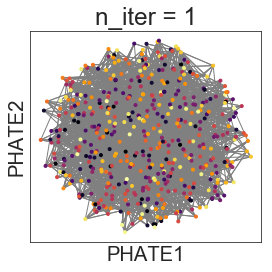

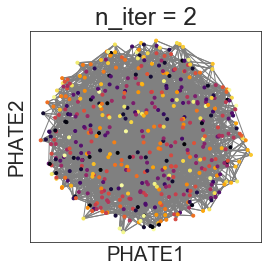

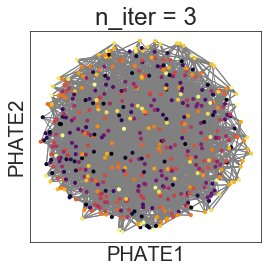

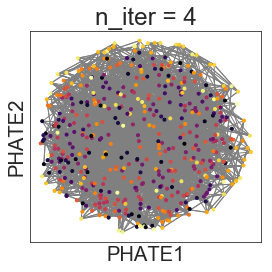

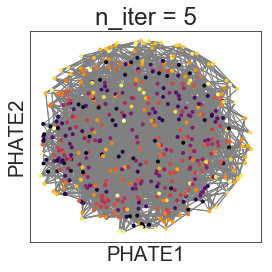

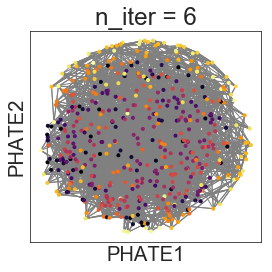

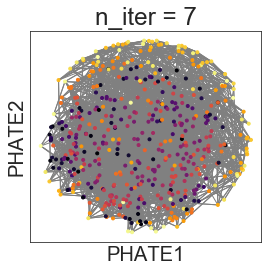

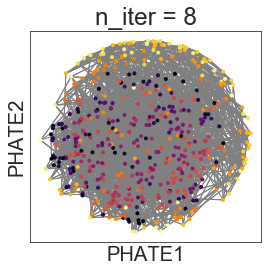

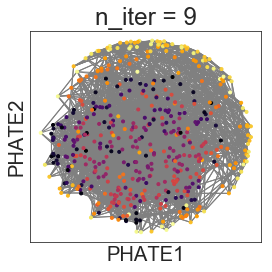

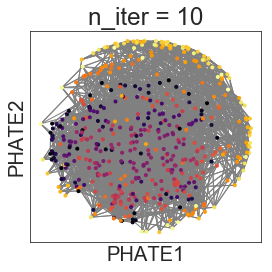

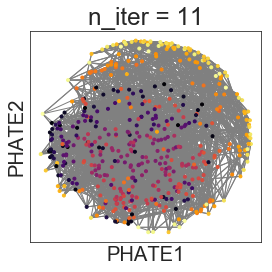

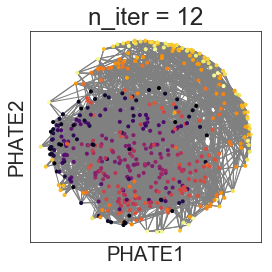

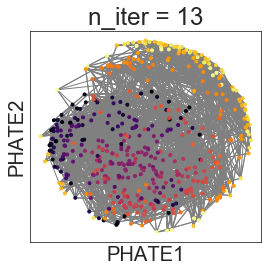

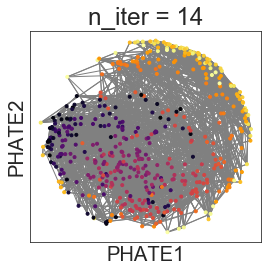

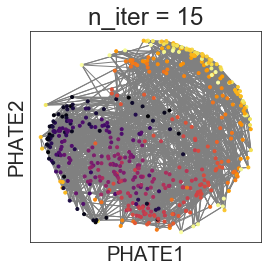

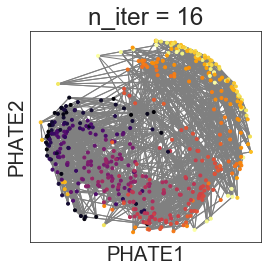

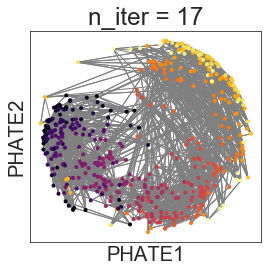

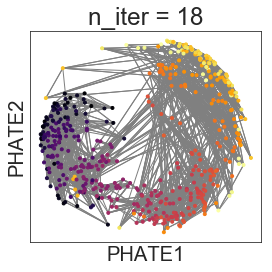

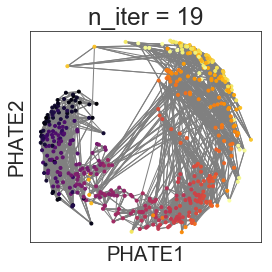

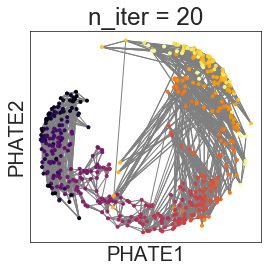

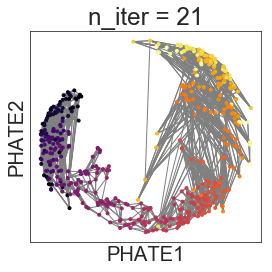

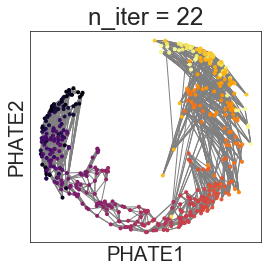

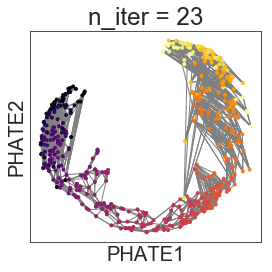

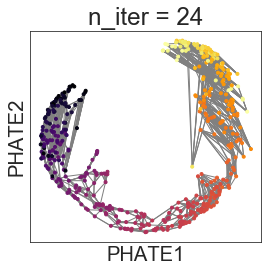

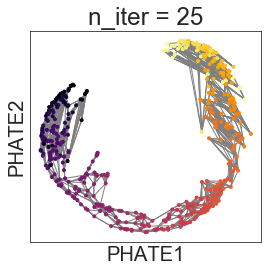

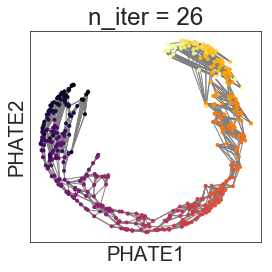

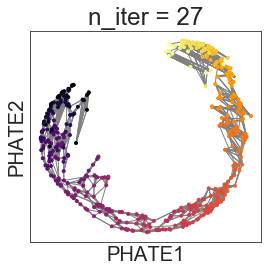

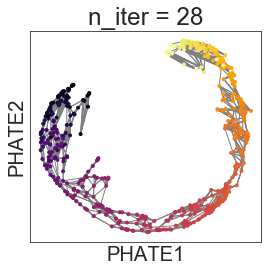

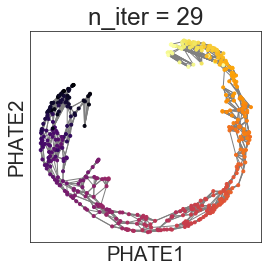

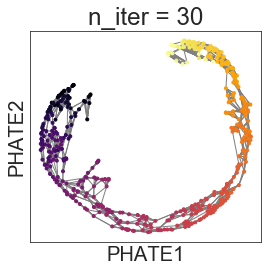

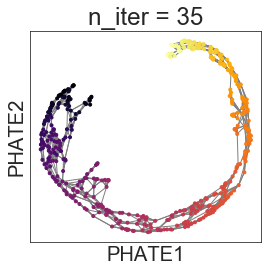

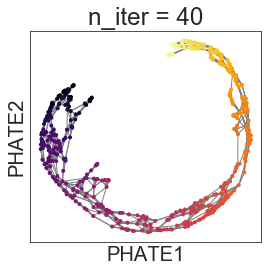

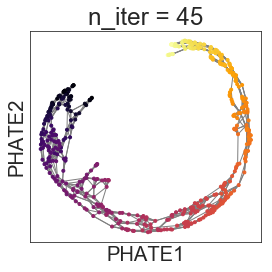

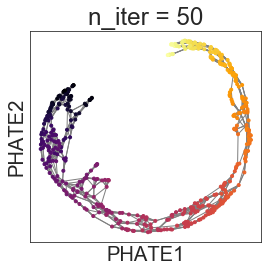

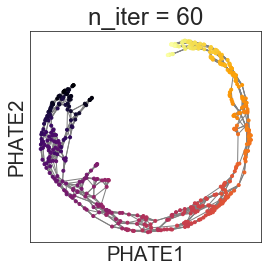

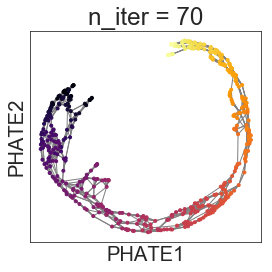

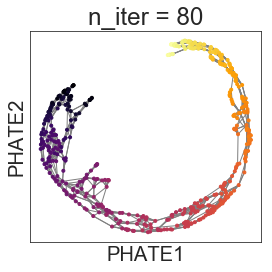

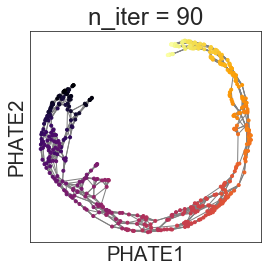

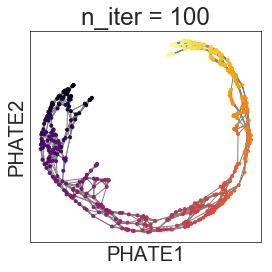

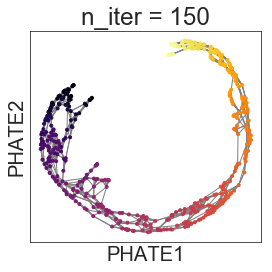

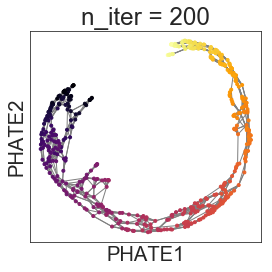

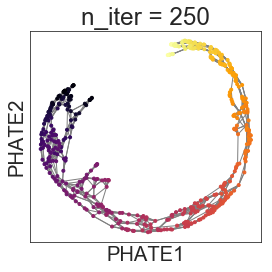

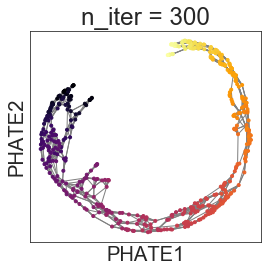

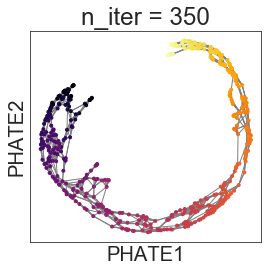

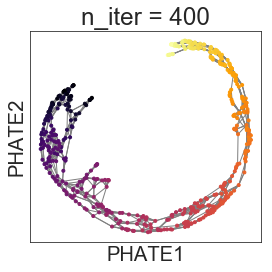

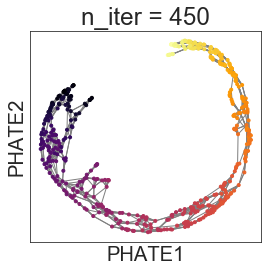

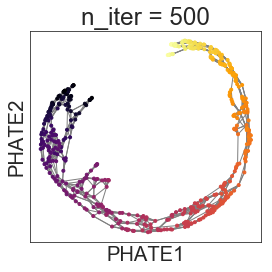

In [93]:
import sklearn.manifold
for n_iter in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500]:
    X_embedded = sklearn.manifold.smacof(D, init=X_init, n_init=1, max_iter=n_iter, random_state=42)[0]
    ax = scprep.plot.scatter2d(X_embedded, c=t, ticks=False, legend=False,
                                   label_prefix="PHATE", figsize=(4,4),
                                   title="n_iter = {}".format(n_iter), fontsize=14)
    for i, pt in enumerate(X_embedded):
        neighbors = knn_dist[i]
        for nn in neighbors:
            nn_coordinates = X_embedded[nn]
            ax.plot([pt[0], nn_coordinates[0]], [pt[1], nn_coordinates[1]],
                   color='grey', zorder=0, linewidth=1)
    plt.savefig("../img/phate/{}.png".format(n_iter))